In [1]:
import numpy as np

In [19]:
def I(t,r):
    return r*np.exp(-r*t)

In [20]:
import matplotlib.pyplot as plt

In [58]:
time = np.arange(0,100)
T    = 10 
N    = 50
r    = N/T

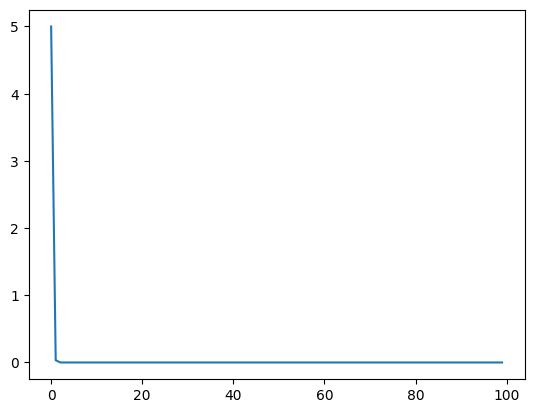

In [59]:
plt.plot(time,I(time, r))

This is my time intervals probablity distribution.I want to sample the time intervals from this distribution.


In [60]:
from numpy.random import rand

In [61]:
def inverse_cdf(F,r):
    return -(1/r) * np.log(1-F)

In [62]:
# Generate uniform random numbers between 0 and 1
uniform_samples = np.random.uniform(0, 1, N)

# Apply the inverse CDF
generated_samples = inverse_cdf(uniform_samples, r)

print("Generated Samples:", generated_samples)

Generated Samples: [0.49970216 0.06500308 0.08018553 0.29114064 0.02015159 0.15416962
 0.24667237 0.46033105 0.41303872 0.02481233 0.07004582 0.66536198
 0.29919449 0.11714798 0.04874192 0.35173792 0.51059603 0.03594919
 0.08383749 0.20827113 0.15104984 0.33858703 0.35720012 0.09749508
 0.19183572 0.23328022 0.19943727 0.20019123 0.12008829 0.09875698
 0.12842272 0.36678384 0.72346111 0.27826588 0.00135753 0.5656893
 0.14635186 0.20411017 0.10233891 0.3169388  0.78347273 0.16116948
 0.13853763 0.65289508 0.13956262 0.37045239 0.03640395 0.06379147
 0.01377435 0.0032246 ]


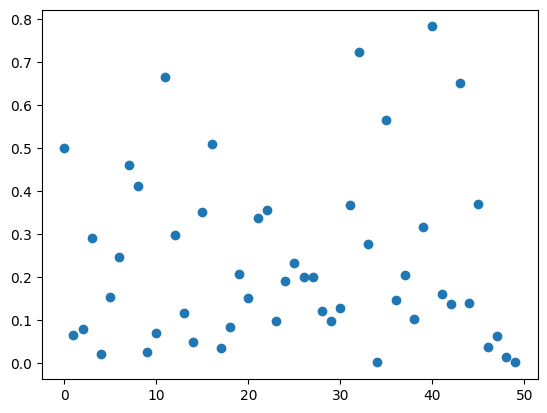

In [63]:
plt.scatter(np.arange(0,len(generated_samples)),generated_samples)

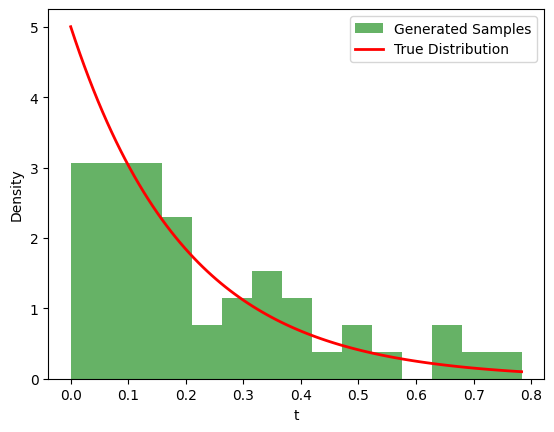

In [65]:
plt.hist(generated_samples, bins=15, density=True, alpha=0.6, color='g', label="Generated Samples")

# Plot actual distribution for comparison
t = np.linspace(0, max(generated_samples), 100)
pdf = r * np.exp(-r * t)
plt.plot(t, pdf, 'r-', lw=2, label="True Distribution")

plt.xlabel("t")
plt.ylabel("Density")
plt.legend()

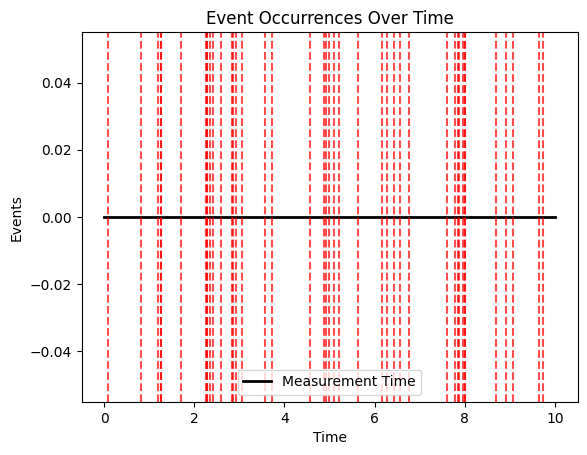

In [66]:
uniform_samples = np.random.uniform(0, 1, N)

# Apply the inverse CDF to get event times
event_times = np.cumsum(inverse_cdf(uniform_samples, r))  # Cumulative sum for sequential event times

# Ensure events within measurement time
event_times = event_times[event_times < T]

plt.plot([0, T], [0, 0], 'k-', lw=2, label="Measurement Time")

# Add vertical lines at event times
for t in event_times:
    plt.axvline(x=t, color='r', linestyle='--', alpha=0.7)

# Labels and title
plt.xlabel("Time")
plt.ylabel("Events")
plt.title("Event Occurrences Over Time")
plt.legend()

Compute mean time interval

In [75]:
meanT = np.sum(event_times * I(event_times,r))/np.sum(I(event_times,r))
trueT = 1/r
res = np.abs(meanT - trueT) 

In [76]:
print(res)

0.08192345083582174
